In [3]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


import pickle
import json

from sklearn.datasets import load_boston

# Ptoblem statement

# Data Gathering

In [5]:
boston_data = load_boston()
df  = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df["PRICE"] = boston_data.target

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# train test split

In [8]:
x = df.drop("PRICE",axis = 1)
y = df["PRICE"]

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.30,random_state=12)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
251,0.21409,22.0,5.86,0.0,0.4310,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
465,3.16360,0.0,18.10,0.0,0.6550,5.759,48.2,3.0665,24.0,666.0,20.2,334.40,14.13
137,0.35233,0.0,21.89,0.0,0.6240,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
311,0.79041,0.0,9.90,0.0,0.5440,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
406,20.71620,0.0,18.10,0.0,0.6590,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54
390,6.96215,0.0,18.10,0.0,0.7000,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02


In [9]:
std_scalar = StandardScaler()
std_scalar.fit(x_train)
array = std_scalar.transform(x_train)

std_train_xdf = pd.DataFrame(array,columns =x_train.columns )
std_train_xdf.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.374293,0.496042,-0.784108,-0.281546,-1.085983,0.262588,-2.153872,1.724363,-0.288945,-0.484736,0.257207,0.230743,-1.286300
1,-0.063496,-0.466383,0.989446,-0.281546,0.880236,-0.746028,-0.760347,-0.332881,1.678106,1.520009,0.778312,-0.230765,0.178041
2,-0.359726,-0.466383,1.538610,-0.281546,0.608125,0.286355,1.019676,-0.910926,-0.636072,0.153680,1.252043,0.414718,0.241949


In [10]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(std_train_xdf,y_train)

#Training data accuracy
y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 13.667389830508473
RMSE: 3.696943309074197
MAE : 2.3287005649717516
R-Squared : 0.8347285470045457


In [11]:
array = std_scalar.transform(x_test)

std_test_df = pd.DataFrame(array,columns = x_test.columns)


#Testing Data Evaluation

y_pred = knn_reg.predict(std_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 22.430097368421055
RMSE: 4.736042374010293
MAE : 3.029605263157895
R-Squared : 0.7443212791427196


In [12]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_xdf,y_train)
    r2_train = knn_reg.score(std_train_xdf,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


r2_train_list:
 [0.9287870761275936, 0.8989546181201291, 0.8685347410808634, 0.8435096330957075, 0.8282940312008443, 0.8034239675731132, 0.7853490562087078, 0.7752382128617695, 0.7646447213196198, 0.7487163185056025, 0.7422422538904887, 0.7345677126640501, 0.7243733536955422, 0.7223104370012603, 0.714439792528349, 0.7072639165777904, 0.7003120441219894, 0.6985345328836481, 0.695283836292837]

r2_test_list:
 [0.8207927820411512, 0.7909208606845003, 0.7828400742174598, 0.77719292352305, 0.7875215807744733, 0.7785786162400544, 0.7871119831271621, 0.7793019875250363, 0.778294275965258, 0.7770740148657234, 0.770815653516244, 0.7609059121674345, 0.7520921338518105, 0.7413889255260191, 0.7414206873139767, 0.7345645404243357, 0.7287361998744291, 0.7181219907807403, 0.7124788365870304]


Text(0.5, 1.0, 'Comparison between Train and Test Accuuracies')

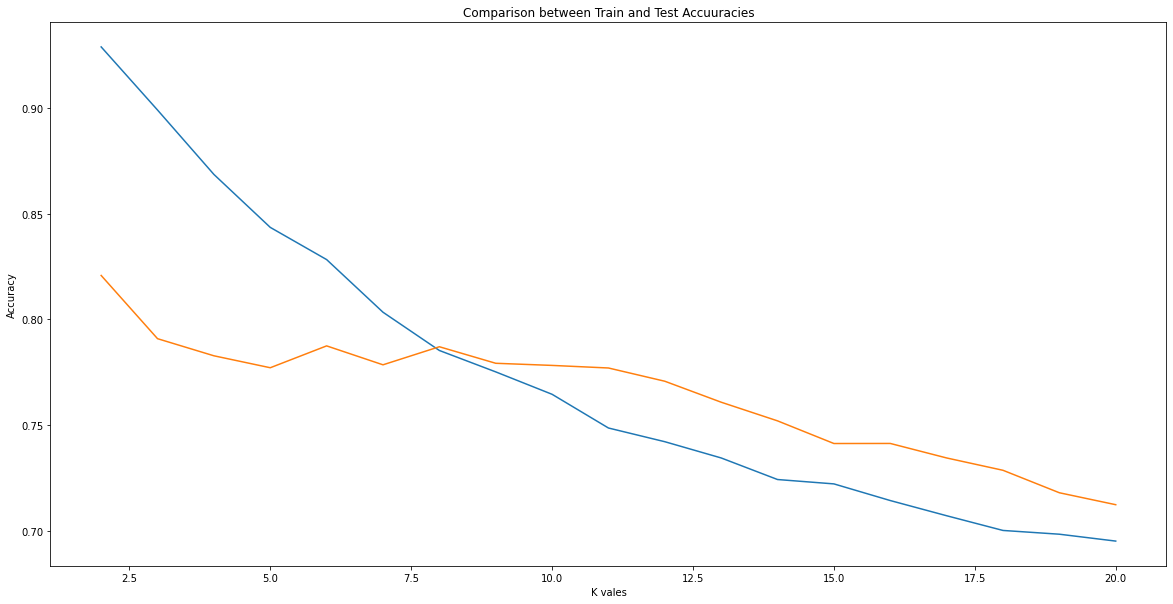

In [13]:
plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")

In [14]:
knn_reg = KNeighborsRegressor(n_neighbors=8,p=1)
knn_reg.fit(std_train_xdf,y_train)


#Training data accuracy
y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 17.750906603107342
RMSE: 4.213182479208246
MAE : 2.556850282485876
R-Squared : 0.7853490562087078


In [15]:
array = std_scalar.transform(x_test)

std_test_df = pd.DataFrame(array,columns = x_test.columns)


#Testing Data Evaluation

y_pred = knn_reg.predict(std_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 18.67616879111842
RMSE: 4.321593316257144
MAE : 2.8949835526315786
R-Squared : 0.7871119831271621


In [16]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
knn_reg

KNeighborsRegressor(n_neighbors=8, p=1)

In [18]:
with open("KNN_Model.pkl","wb") as f:
    pickle.dump(knn_reg,f)

In [19]:
std_scalar

StandardScaler()

In [20]:
with open("Scaling.pkl","wb") as f:
    pickle.dump(std_scalar,f)

In [31]:
project_data = {"columns": list(x_test.columns)}
project_data["columns"]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [32]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)

# testing on single Row

In [21]:
x_test.iloc[10]

CRIM         0.06724
ZN           0.00000
INDUS        3.24000
CHAS         0.00000
NOX          0.46000
RM           6.33300
AGE         17.20000
DIS          5.21460
RAD          4.00000
TAX        430.00000
PTRATIO     16.90000
B          375.21000
LSTAT        7.34000
Name: 329, dtype: float64

In [22]:
CRIM      =   0.05724
ZN         =  0.00000
INDUS      =  4.24000
CHAS       =  0.00000
NOX        =  0.46000
RM         =  6.33300
AGE       = 15.20000
DIS        =  7.21460
RAD        =  2.00000
TAX       = 450.00000
PTRATIO    = 17.90000
B          =370.21000
LSTAT      =  8.34000

In [25]:
test_array = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX,
       PTRATIO, B, LSTAT],ndmin=2)

scaled_test_array = std_scalar.transform(test_array)

predicted_value = knn_reg.predict(scaled_test_array)[0]
predicted_value

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


22.5625